### Importing the Libraries

In [1]:
import pandas as pd
import os

### Merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv('Data/Sales_January_2019.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
for file in os.listdir('Data'):
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
all_months_data = pd.DataFrame()

for file in os.listdir('Data'):
    df = pd.read_csv('Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()
all_months_data.to_csv('all_months_data.csv', index = False)

In [6]:
all_data = pd.read_csv("all_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data.shape

(186850, 6)

In [8]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [10]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Cleanup Missing Values

In [11]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [12]:
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


#### Since this is a full rows of Nan's we will go ahead and drop nan

In [13]:
all_data = all_data.dropna(how = 'all')

In [14]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
all_data.shape

(186305, 6)

In [16]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']

In [17]:
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Extracting month from ordered date

In [19]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


### Converting coulms to correct datatype

In [21]:
all_data['Month'] = all_data['Month'].astype('int32')

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [23]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


### Adding sales column

In [25]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding a city column

In [27]:
all_data['Purchase Address'][0].split(",")

['917 1st St', ' Dallas', ' TX 75001']

In [28]:
all_data['Purchase Address'][0].split(",")[1]

' Dallas'

In [29]:
all_data['Purchase Address'][0].split(",")[1].strip(" ")

'Dallas'

In [30]:
all_data['Purchase Address'][0].split(",")[2].strip(" ")

'TX 75001'

In [31]:
all_data['Purchase Address'][0].split(",")[2].strip(" ").split(" ")

['TX', '75001']

In [32]:
all_data['Purchase Address'][0].split(",")[2].strip(" ").split(" ")[0]

'TX'

In [33]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].strip(" ").split(" ")[0]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Data Exploration

### Q1: What was the best month for sales? What was the earnings for that month?

In [34]:
all_data.groupby(all_data['Month']).sum()

,Quantity Ordered,Price Each,Month,Sales
Month,,,,
1,10903,1.811768e+06,9709,1.822257e+06
2,13449,2.188885e+06,23950,2.202022e+06
3,17005,2.791208e+06,45459,2.807100e+06
4,20558,3.367671e+06,73116,3.390670e+06
5,18667,3.135125e+06,82830,3.152607e+06
6,15253,2.562026e+06,81324,2.577802e+06
7,16072,2.632540e+06,100051,2.647776e+06
8,13448,2.230345e+06,95688,2.244468e+06
9,13109,2.084992e+06,104589,2.097560e+06


In [35]:
all_data.groupby('Month')['Sales'].sum().sort_values(ascending = False)

Month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: Sales, dtype: float64

range(1, 13)


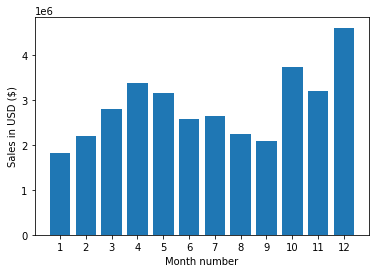

In [36]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### As see above, december has most sales

### Q2: What city had the best sales?

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


select city, count(*)
from table
group by city ; 

In [38]:
all_data.groupby(all_data['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


In [39]:
all_data.groupby(['City'])['Sales'].sum().sort_values(ascending = False)

City
San Francisco  (CA)    8.262204e+06
Los Angeles  (CA)      5.452571e+06
New York City  (NY)    4.664317e+06
Boston  (MA)           3.661642e+06
Atlanta  (GA)          2.795499e+06
Dallas  (TX)           2.767975e+06
Seattle  (WA)          2.747755e+06
Portland  (OR)         1.870732e+06
Austin  (TX)           1.819582e+06
Portland  (ME)         4.497583e+05
Name: Sales, dtype: float64

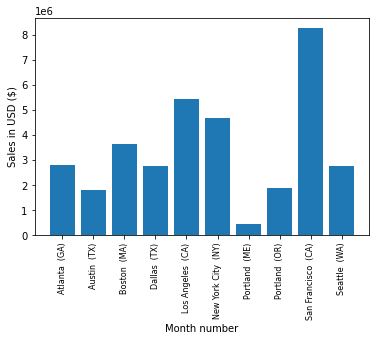

In [40]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### San Francisco (CA) has the highest number of sales.
#### Why SF? May be electronics / may be people earn more there?

### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 18.5+ MB


In [42]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Let's convert the order date to date time object 

In [43]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [44]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 18.5+ MB


In [45]:
### Adding hour and minute columns

all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


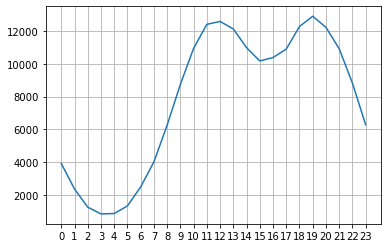

In [46]:
all_data['Count'] = 1
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

#### We have 2 peaks at 11am and 7pm
#### The best time to advertize might be 11am - 1pm and 7pm - 9pm

### Question 4: What products are most often sold together?

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


### As we see above, the related items are actually ordered together in the smae order. SO, the order is is duplicated for each product ordered as seen above

In [51]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]



In [52]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1


In [53]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-53-245d2f97c564>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [54]:
df2.head(20)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [55]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [60]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    print(row_list)
    count.update(Counter(combinations(row_list, 2)))

print(count)



['Google Phone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Bose SoundSport Headphones', 'Bose SoundSport Headphones']
['AAA Batteries (4-pack)', 'Google Phone']
['Lightning Charging Cable', 'USB-C Charging Cable']
['Apple Airpods Headphones', 'ThinkPad Laptop']
['Bose SoundSport Headphones', 'AAA Batteries (4-pack)']
['34in Ultrawide Monitor', 'Google Phone']
['Lightning Charging Cable', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'Wired Headphones']
['Google Phone', 'Wired Headphones']
['AAA Batteries (4-pack)', '27in FHD Monitor']
['USB-C Charging Cable', 'AAA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['iPhone', 'Wired Headphones']
['iPhone', '27in 4K Gaming Monitor']
['iPhone', 'Lightning Charging Cable']
['ThinkPad Laptop', 'AAA Batteries (4-pack)']
['iPhone', 'Apple Ai

['Lightning Charging Cable', '34in Ultrawide Monitor']
['Bose SoundSport Headphones', 'Apple Airpods Headphones']
['USB-C Charging Cable', 'Wired Headphones']
['Apple Airpods Headphones', 'Google Phone']
['20in Monitor', 'Wired Headphones']
['iPhone', 'Apple Airpods Headphones']
['AAA Batteries (4-pack)', 'Apple Airpods Headphones']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['Macbook Pro Laptop', 'Apple Airpods Headphones']
['Google Phone', 'AAA Batteries (4-pack)']
['Lightning Charging Cable', 'Bose SoundSport Headphones']
['USB-C Charging Cable', 'AAA Batteries (4-pack)']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Wired Headphones']
['Google Phone', 'Bose SoundSport Headphones']
['Google Phone', 'USB-C Charging Cable']
['34in Ultrawide Monitor', 'USB-C Charging Cable']
['Lightning Charging Cable', 'USB-C Charging Cable']
['Google Phone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']


['ThinkPad Laptop', 'AA Batteries (4-pack)']
['Apple Airpods Headphones', 'Lightning Charging Cable']
['LG Washing Machine', 'Bose SoundSport Headphones']
['iPhone', 'Wired Headphones']
['20in Monitor', 'USB-C Charging Cable']
['USB-C Charging Cable', 'Apple Airpods Headphones']
['Vareebadd Phone', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['Lightning Charging Cable', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['Google Phone', 'Bose SoundSport Headphones']
['Bose SoundSport Headphones', 'AAA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['Lightning Charging Cable', 'Macbook Pro Laptop']
['iPhone', 'Lightning Charging Cable']
['27in 4K Gaming Monitor', 'Bose SoundSport Headphones']
['Vareebadd Phone', 'USB-C Charging Cable']
['iPhone', 'Apple Airpods Headphones']
['ThinkPad Laptop', 'AAA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['Lightning Charging Cable', 'iPhone']
['Google Phone', 'USB-C Charging Cable']
['Wired H

['iPhone', 'Wired Headphones']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Lightning Charging Cable', 'Wired Headphones']
['AAA Batteries (4-pack)', 'Wired Headphones']
['Apple Airpods Headphones', 'Google Phone']
['AA Batteries (4-pack)', 'Apple Airpods Headphones']
['iPhone', 'Lightning Charging Cable']
['Vareebadd Phone', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Wired Headphones']
['iPhone', 'Wired Headphones']
['Bose SoundSport Headphones', '27in 4K Gaming Monitor']
['Vareebadd Phone', 'Wired Headphones']
['27in FHD Monitor', 'USB-C Charging Cable']
['Google Phone', 'Wired Headphones']
['USB-C Charging Cable', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['Lightning Charging Cable', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Flatscreen TV', 'iPhone']
['Google Phone', 'USB-C Charging Cable']


['iPhone', 'Lightning Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'USB-C Charging Cable', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['Apple Airpods Headphones', 'Google Phone']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'Bose SoundSport Headphones']
['Vareebadd Phone', 'USB-C Charging Cable']
['AAA Batteries (4-pack)', 'iPhone']
['Google Phone', 'USB-C Charging Cable']
['Lightning Charging Cable', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['AAA Batteries (4-pack)', 'AA Batteries (4-pack)']
['Google Phone', 'Wired Headphones']
['iPhone', 'Wired Headphones']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'Wired Headphones']
['27in 4K Gaming Monitor', 'Wired Headphones']
['iPhone', 'Lightning Charging Cable']
['AA Batteries (4-pack)', 'Lightning Charging Cable']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'AA Batteries (4-pack)']
['Google Phone', 'Bose SoundS

In [57]:
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Offer small deals for these common pairs and use that to your advantage!

### Q5: What product sold the most? Why do you think it sold the most?

In [65]:
product_group = all_data.groupby('Product')
print(product_group.sum())



                            Quantity Ordered  Price Each   Month       Sales  \
Product                                                                        
20in Monitor                            4129   451068.99   29336   454148.71   
27in 4K Gaming Monitor                  6244  2429637.70   44440  2435097.56   
27in FHD Monitor                        7550  1125974.93   52558  1132424.50   
34in Ultrawide Monitor                  6199  2348718.19   43304  2355558.01   
AA Batteries (4-pack)                  27635    79015.68  145558   106118.40   
AAA Batteries (4-pack)                 31017    61716.59  146370    92740.83   
Apple Airpods Headphones               15661  2332350.00  109477  2349150.00   
Bose SoundSport Headphones             13457  1332366.75   94113  1345565.43   
Flatscreen TV                           4819  1440000.00   34224  1445700.00   
Google Phone                            5532  3315000.00   38305  3319200.00   
LG Dryer                                

In [66]:

quantity_ordered = product_group.sum()['Quantity Ordered']
print(quantity_ordered)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


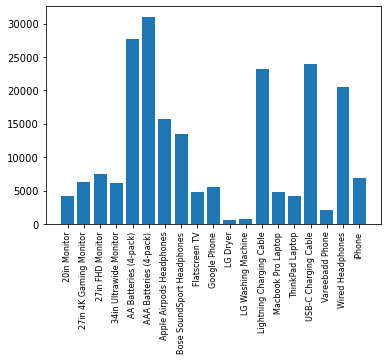

In [67]:
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()